## Boosting

### AdaBoost

/Users/jaybansal/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



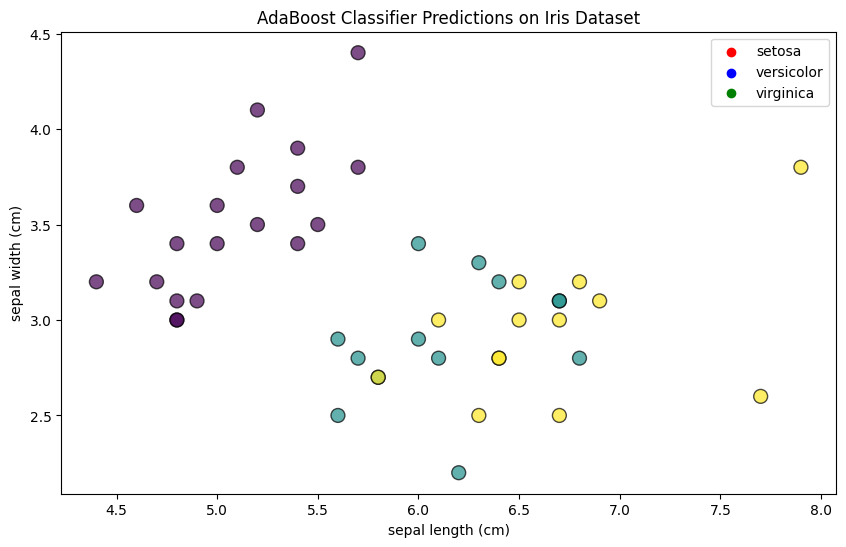

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization (optional)
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base estimator (a decision stump)
base_estimator = DecisionTreeClassifier(max_depth=1)  # Simple tree

# Create the AdaBoost model without specifying base_estimator
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the decision boundaries (optional)
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=100, edgecolor='k', alpha=0.7)

# Create a legend
classes = np.unique(y_pred)
colors = ['red', 'blue', 'green']  # Assign colors for each class

# Adding a legend
for class_id, color in zip(classes, colors):
    plt.scatter([], [], color=color, label=iris.target_names[class_id])

plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("AdaBoost Classifier Predictions on Iris Dataset")
plt.show()

### Gradient Boosting

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Create DataFrame for better visualization (optional)
california_df = pd.DataFrame(data=X, columns=california_housing.feature_names)
california_df['Price'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Display predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Squared Error: 0.29
    Actual  Predicted
0  0.47700   0.549768
1  0.45800   0.978304
2  5.00001   4.045557
3  2.18600   2.611494
4  2.78000   2.261330


### XGBoost

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Create DataFrame for better visualization (optional)
california_df = pd.DataFrame(data=X, columns=california_housing.feature_names)
california_df['Price'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Display predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Squared Error: 0.29
    Actual  Predicted
0  0.47700   0.574563
1  0.45800   1.006395
2  5.00001   4.160701
3  2.18600   2.586788
4  2.78000   2.238613
